# **Data Visualisation**
Since we used different datasets for different kinds of analyses in our project, data visualisation will be conducted for the 2 datasets used. The wo datasets are as follows:
> 1. merged200k.csv
> 2. merged20k.csv

#### **Import Necessary Libraries**

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler

---

# **Dataset 1: merged200k.csv**
This dataset was used for the analysis of <u>***continuous numerical*** audio features</u> and <u>track popularity</u>. Audio features were chosen as the predictors as we felt that it could reveal interesting data on people's subconscious preferences for songs sonically.

Track popularity was chosen as the response as it is a variable that reflects how much people like the song.

> **Predictors:** Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo\
> **Response:** Track Popularity

In [2]:
merged200k = pd.read_csv("datasets/merged200k.csv")
merged200k

,Track Name,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Popularity,track_id
0,act ii: date @ 8 (feat. Drake) - remix,NaN,0.550,0.545,0.0,-9.304,1.0,0.1630,0.3180,0.000000,0.0608,0.412,102.469,4.0,86,3QS9ZCtoSCJhmaJ7QNXSAS
1,LEAP!,NaN,0.892,0.585,11.0,-7.269,1.0,0.1020,0.1460,0.000004,0.0881,0.244,104.011,4.0,38,3vl2uH4D2QItFFhzz5L06g
2,Overdrive,"bedroom pop, pop, pov: indie",0.568,0.788,5.0,-6.280,1.0,0.0377,0.0101,0.000000,0.1410,0.460,104.959,4.0,66,3QyoC6OvQUmpQwQZ18iaTs
3,Raise y_our glass,NaN,0.567,0.503,8.0,-6.119,1.0,0.1240,0.5810,0.000000,0.3690,0.184,72.798,4.0,59,7j1vFohEm1lbsctYY9gyGd
4,In My Mind,gen z singer-songwriter,0.668,0.392,2.0,-12.178,0.0,0.0585,0.7890,0.002750,0.3450,0.323,135.936,3.0,72,2W779g2UrRZtVdf3FcEOO1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191390,Quickly (feat. Brandy),Soul,0.736,0.701,A#,-4.345,Minor,0.1000,0.2310,0.000000,0.2030,0.770,99.991,4/4,39,1U0OMWvR89Cm20vCNar50f
191391,P.O.P.,Soul,0.802,0.516,D,-9.014,Major,0.2130,0.1040,0.000485,0.1050,0.482,175.666,4/4,43,2gGqKJWfWbToha2YmDxnnj
191392,I'll Take Care Of You - Single Version,Soul,0.423,0.337,A#,-13.092,Minor,0.0436,0.5660,0.000000,0.2760,0.497,80.023,4/4,32,2iZf3EUedz9MPqbAvXdpdA
191393,Burning Fire,Soul,0.785,0.683,E,-6.944,Minor,0.0337,0.0329,0.000880,0.2370,0.969,113.830,4/4,38,1qWZdkBl4UVPj9lK6HuuFM


## **Cleaning Dataset**

### **Track Popularity**
There are a huge number of tracks that have a track popularity of 0, as seen below.

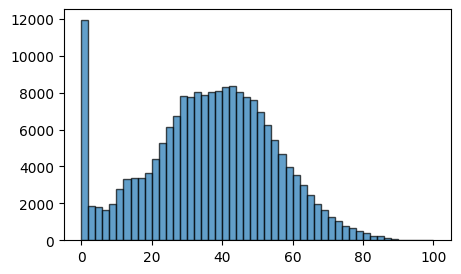

In [3]:
plt.figure(figsize=(5, 3))
plt.hist(merged200k['Track Popularity'], bins=50, alpha=0.7, edgecolor='black')
plt.show()

In [4]:
merged200k.loc[merged200k['Track Popularity']==0].head(10)

,Track Name,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Popularity,track_id
32,Take Me To Church,"irish singer-songwriter, modern rock, pov: indie",0.566,0.664,4.0,-5.303,0.0,0.0464,0.634000,0.000000,0.1160,0.437,128.945,4.0,0,7dS5EaCoMnN7DzlpT6aRn2
39,The Heart Wants What It Wants,"pop, post-teen pop",0.616,0.789,7.0,-4.874,0.0,0.0377,0.053000,0.000000,0.1420,0.621,83.066,4.0,0,2jcPoPin36hyNRSi4ZsqeB
41,Bumpy Ride,NaN,0.709,0.854,0.0,-4.447,0.0,0.0399,0.047000,0.000000,0.0724,0.826,105.074,4.0,0,0tBRo4P60DgKmg4jt48upm
42,Danza Kuduro (feat. Don Omar),reggaeton,0.706,0.890,0.0,-6.575,1.0,0.0847,0.085500,0.000000,0.0465,0.896,130.051,4.0,0,1kAZhbcsXqfUjnVeqPywn2
45,Girlfriend,"canadian pop, candy pop, dance pop, pop",0.560,0.959,7.0,-2.433,1.0,0.1020,0.000738,0.000206,0.2090,0.670,163.983,4.0,0,5HbCnVLXRyZVxnreOPgJCK
46,Baby,"canadian pop, pop",0.463,0.854,8.0,-5.386,1.0,0.3200,0.042800,0.000000,0.0922,0.567,65.038,4.0,0,4NFhtFE68cXUrfbne8JE2c
48,Coconut Tree,NaN,0.687,0.855,7.0,-5.341,0.0,0.0416,0.048600,0.000000,0.2330,0.647,130.029,4.0,0,5L9THbmMKB6ZlHlMgzaXHf
49,One Less Lonely Girl,"canadian pop, pop",0.580,0.750,4.0,-4.421,1.0,0.1940,0.159000,0.000000,0.2740,0.728,86.938,4.0,0,7qUcqYzOtfZe65bednDxmz
51,Don't You Worry Child - Radio Edit,"edm, pop dance, progressive electro house",0.608,0.828,2.0,-3.597,1.0,0.0510,0.125000,0.000000,0.1130,0.484,128.919,4.0,0,5DcPOPPUnNhyPYbTi2aWjR
54,Radioactive,"modern rock, pop, rock",0.473,0.777,9.0,-3.698,1.0,0.0590,0.119000,0.000079,0.6710,0.210,136.249,4.0,0,6Ep6BzIOB9tz3P4sWqiiAB


 On further observation, there are definitely some songs that by general knowledge are definitely not unpopular! This is perhaps a limitation where Spotify did not update the song's track popularity, and thus assigned a value of 0 by default. Unfortunately, we will have to remove these tracks.

In [5]:
merged200k.drop(merged200k.loc[merged200k['Track Popularity']==0].index, inplace=True)

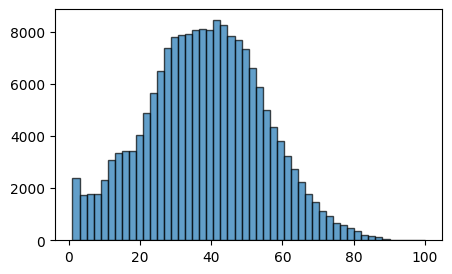

In [6]:
plt.figure(figsize=(5, 3))
plt.hist(merged200k['Track Popularity'], bins=50, alpha=0.7, edgecolor='black')
plt.show()

Much better! This verifies that the tracks with popularity of zero are removed from the dataset.

## **Visualisation of each variable**

In [7]:
# Retrieve relevant variables -- audio features and track popularity
songdata1 = pd.DataFrame(merged200k.select_dtypes(include=['int64','float64']))
songdata1

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.550,0.545,-9.304,0.1630,0.3180,0.000000,0.0608,0.412,102.469,86
1,0.892,0.585,-7.269,0.1020,0.1460,0.000004,0.0881,0.244,104.011,38
2,0.568,0.788,-6.280,0.0377,0.0101,0.000000,0.1410,0.460,104.959,66
3,0.567,0.503,-6.119,0.1240,0.5810,0.000000,0.3690,0.184,72.798,59
4,0.668,0.392,-12.178,0.0585,0.7890,0.002750,0.3450,0.323,135.936,72
...,...,...,...,...,...,...,...,...,...,...
191390,0.736,0.701,-4.345,0.1000,0.2310,0.000000,0.2030,0.770,99.991,39
191391,0.802,0.516,-9.014,0.2130,0.1040,0.000485,0.1050,0.482,175.666,43
191392,0.423,0.337,-13.092,0.0436,0.5660,0.000000,0.2760,0.497,80.023,32
191393,0.785,0.683,-6.944,0.0337,0.0329,0.000880,0.2370,0.969,113.830,38


In [8]:
songdata1.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
count,180878.000000,180878.000000,180878.000000,180878.000000,180878.000000,180878.000000,180878.000000,180878.000000,180878.000000,180878.000000
mean,0.543931,0.569829,-9.842760,0.124479,0.386427,0.163722,0.223169,0.454051,117.512178,38.094832
std,0.188678,0.272142,6.268764,0.200279,0.361621,0.316561,0.209153,0.266314,31.155623,16.683441
min,0.000000,0.000020,-52.457000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,1.000000
25%,0.420000,0.370000,-12.337000,0.036600,0.040600,0.000000,0.097400,0.227000,92.446500,27.000000
50%,0.561000,0.610000,-7.909000,0.049100,0.256000,0.000056,0.130000,0.444000,115.527000,38.000000
75%,0.684000,0.797000,-5.505000,0.099500,0.763000,0.063500,0.276000,0.668000,138.941750,50.000000
max,0.989000,1.000000,3.744000,0.967000,0.996000,0.999000,1.000000,1.000000,242.903000,100.000000


## **Distribution of Response (Track Popularity)**

In [9]:
songdata1["Track Popularity"].describe()

count    180878.000000
mean         38.094832
std          16.683441
min           1.000000
25%          27.000000
50%          38.000000
75%          50.000000
max         100.000000
Name: Track Popularity, dtype: float64

Text(0.5, 0.98, 'Distribution of Track Popularity for merged200k')

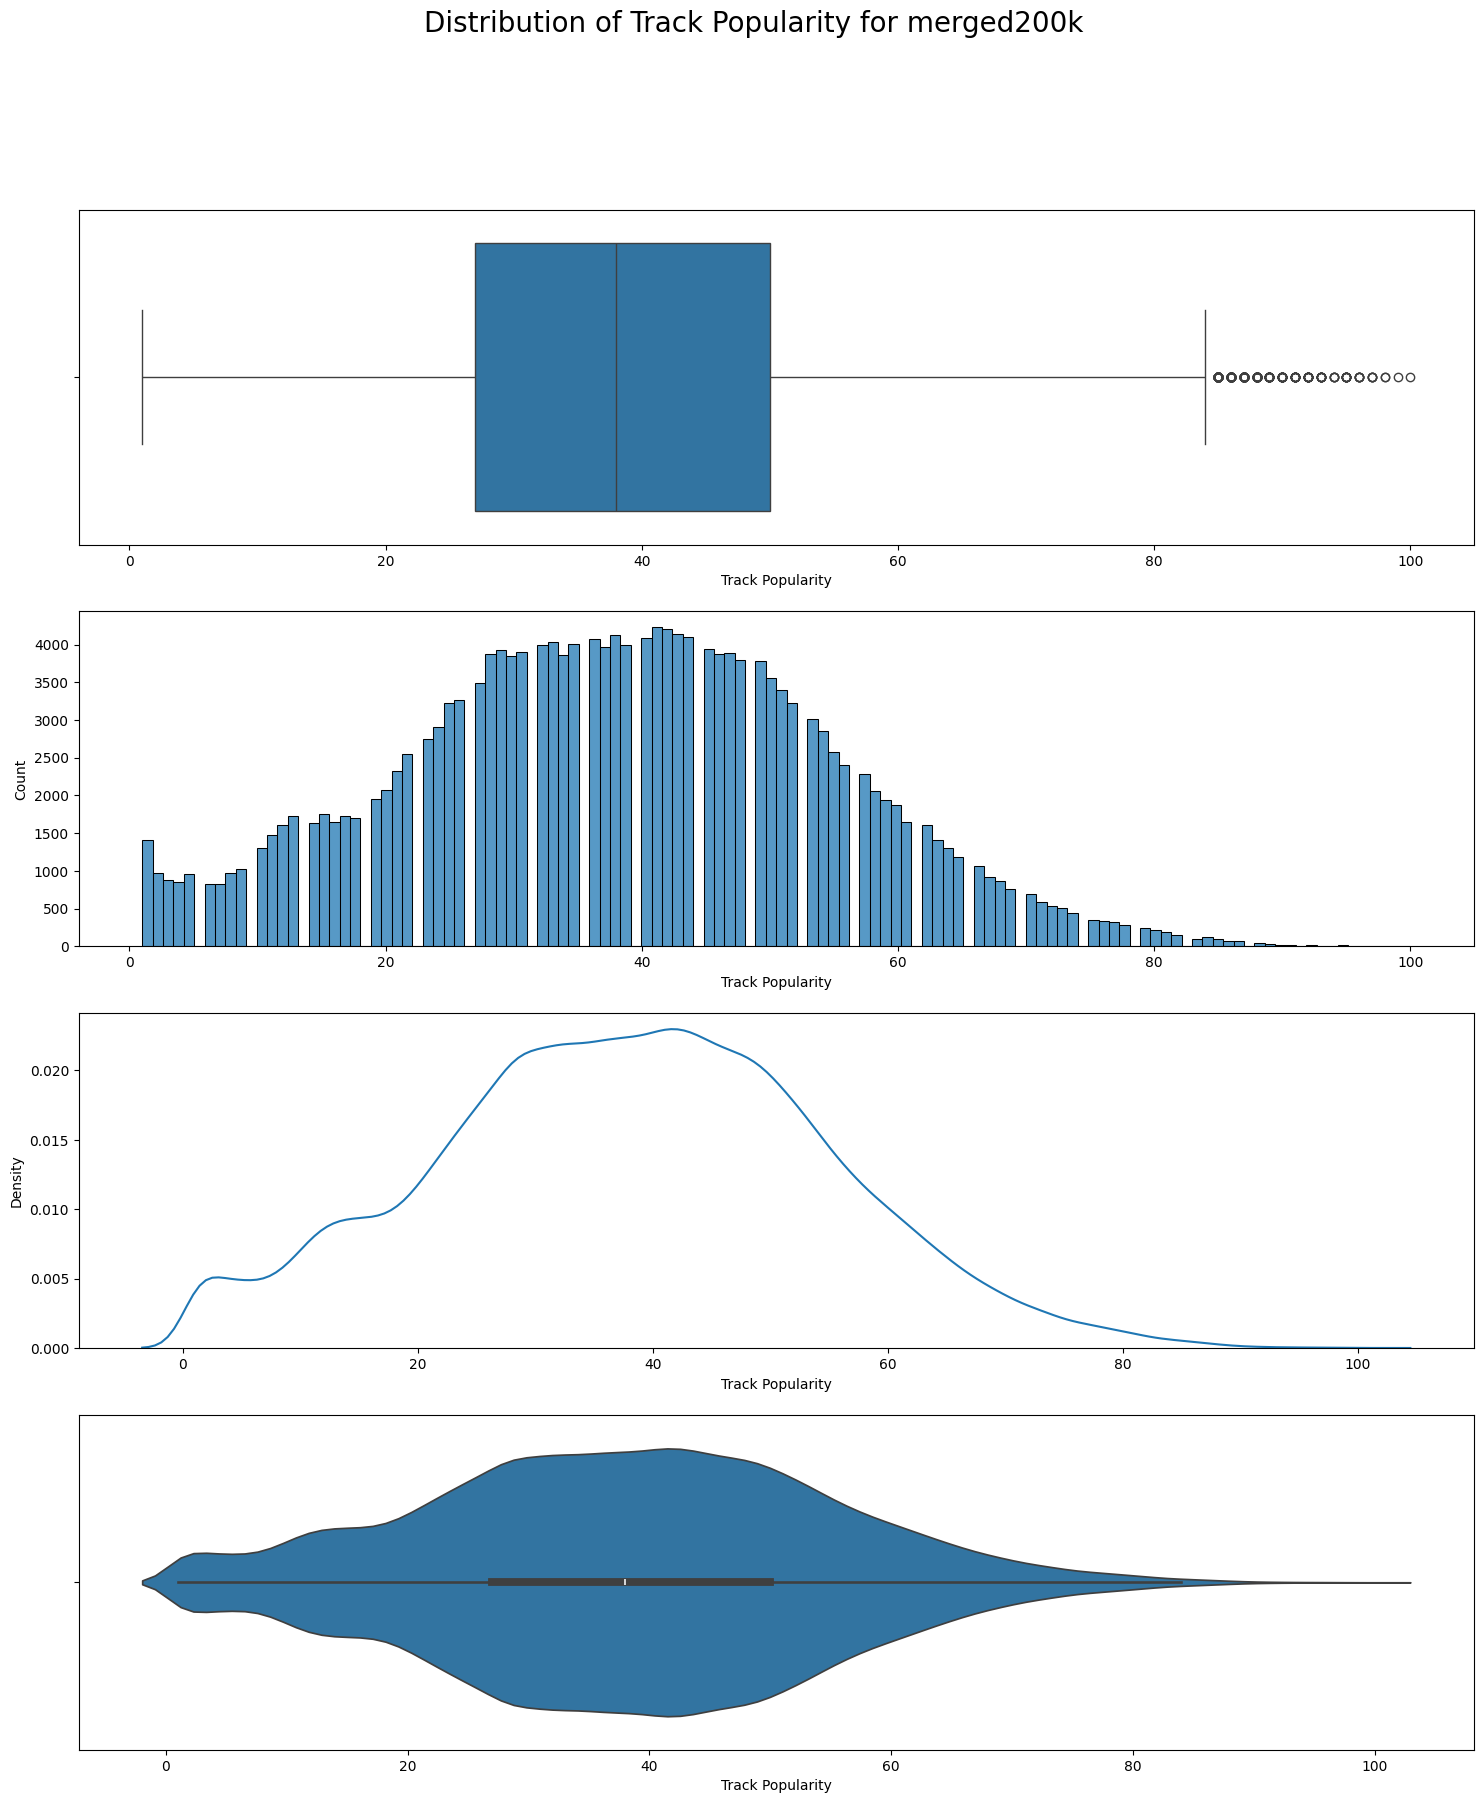

In [10]:
# Plot distribution of Track Popularity
f, axes = plt.subplots(4, figsize=(18,20))
box_tp = sb.boxplot(data=songdata1["Track Popularity"], orient="h", ax=axes[0])
histo_tp = sb.histplot(data=songdata1["Track Popularity"], ax=axes[1])
kde_tp = sb.kdeplot(data=songdata1["Track Popularity"], ax=axes[2])
violin_tp = sb.violinplot(data=songdata1["Track Popularity"], orient="h", ax=axes[3])
f.suptitle("Distribution of Track Popularity for merged200k", fontsize=20)

Even after removing the excessive number of invalid 'track popularity = 0' tracks, the distribution is still skewed to the left as seen in the plots above. There are too few tracks with a high 'track popularity' value.

Thus, we conducted resampling on 'merged200k.csv' in order to balance out the distribution.

The process of data resampling is explained in our <u>***'data-resampling.ipynb'***</u> notebook.

## **Distribution of Predictors**

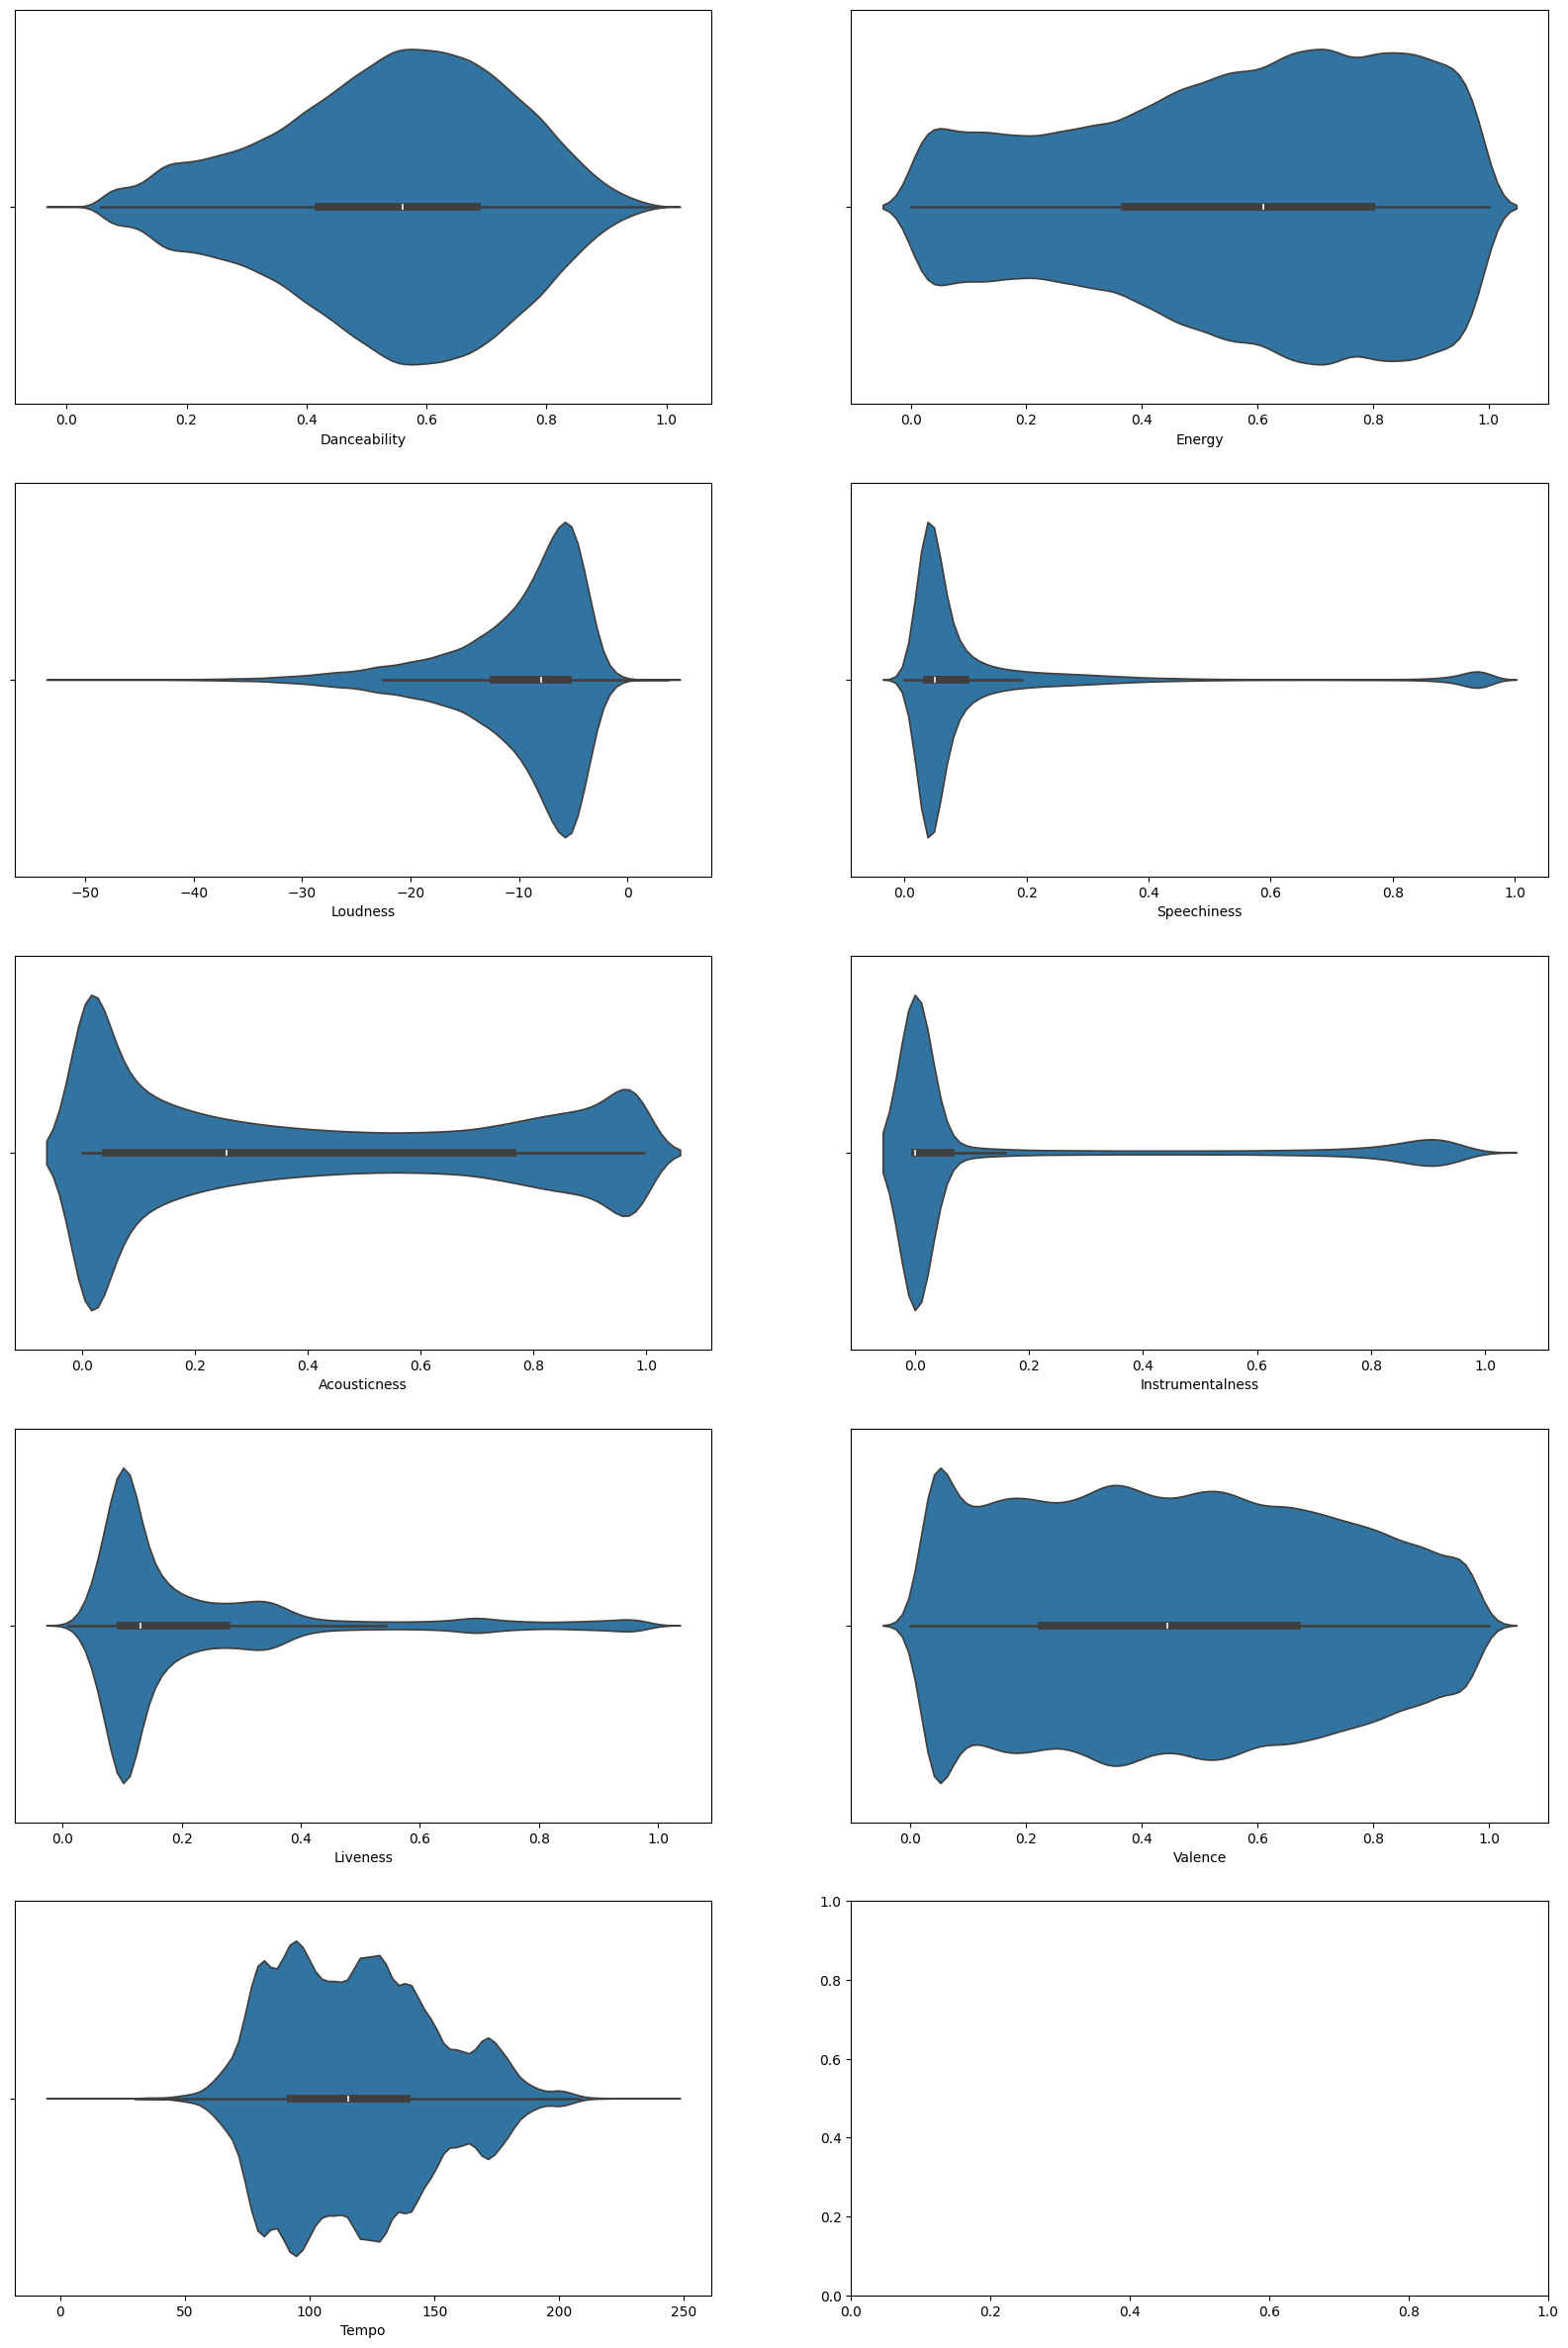

In [11]:
# Plot the distribution of predictors
f, axes = plt.subplots(5,2,figsize=(20,30))
total = 0
row = 0

audio_features = [c for c in songdata1.columns if c != "Track Popularity"]

for var in audio_features:
    if total % 2 == 0:
        col = 0
    else:
        col = 1
    
    vp = sb.violinplot(data=songdata1[var], orient='h', ax=axes[row,col])
    vp.set_xlabel(var, fontsize=10)
    total += 1

    if total % 2 == 0:
        row += 1


As seen from the distribution plots above, a few of the variables are <u>skewed to one end</u> (i.e. Loudness, Instrumentalness, Speechiness, Acousticness, Liveness)

However, some of the variables have quite a <u>centered distribution</u> (i.e. Danceability, Energy, Valence, Tempo)

## **Relation of Predictors with Response (Audio Features, Track Popularity)**

In [12]:
songdata1.corr()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
Danceability,1.000000,0.373081,0.465823,0.124942,-0.387733,-0.375319,-0.027952,0.580858,0.039931,0.254276
Energy,0.373081,1.000000,0.822642,0.160899,-0.726780,-0.397985,0.207264,0.463806,0.244056,0.192757
Loudness,0.465823,0.822642,1.000000,-0.002353,-0.692612,-0.512995,0.053469,0.431496,0.247338,0.301562
Speechiness,0.124942,0.160899,-0.002353,1.000000,0.178149,-0.183200,0.557373,0.013004,-0.101026,-0.180055
Acousticness,-0.387733,-0.726780,-0.692612,0.178149,1.000000,0.310324,0.082283,-0.361292,-0.262092,-0.323777
Instrumentalness,-0.375319,-0.397985,-0.512995,-0.183200,0.310324,1.000000,-0.155981,-0.335645,-0.110873,-0.158764
Liveness,-0.027952,0.207264,0.053469,0.557373,0.082283,-0.155981,1.000000,0.007715,-0.060964,-0.184318
Valence,0.580858,0.463806,0.431496,0.013004,-0.361292,-0.335645,0.007715,1.000000,0.154584,0.083691
Tempo,0.039931,0.244056,0.247338,-0.101026,-0.262092,-0.110873,-0.060964,0.154584,1.000000,0.086131
Track Popularity,0.254276,0.192757,0.301562,-0.180055,-0.323777,-0.158764,-0.184318,0.083691,0.086131,1.000000


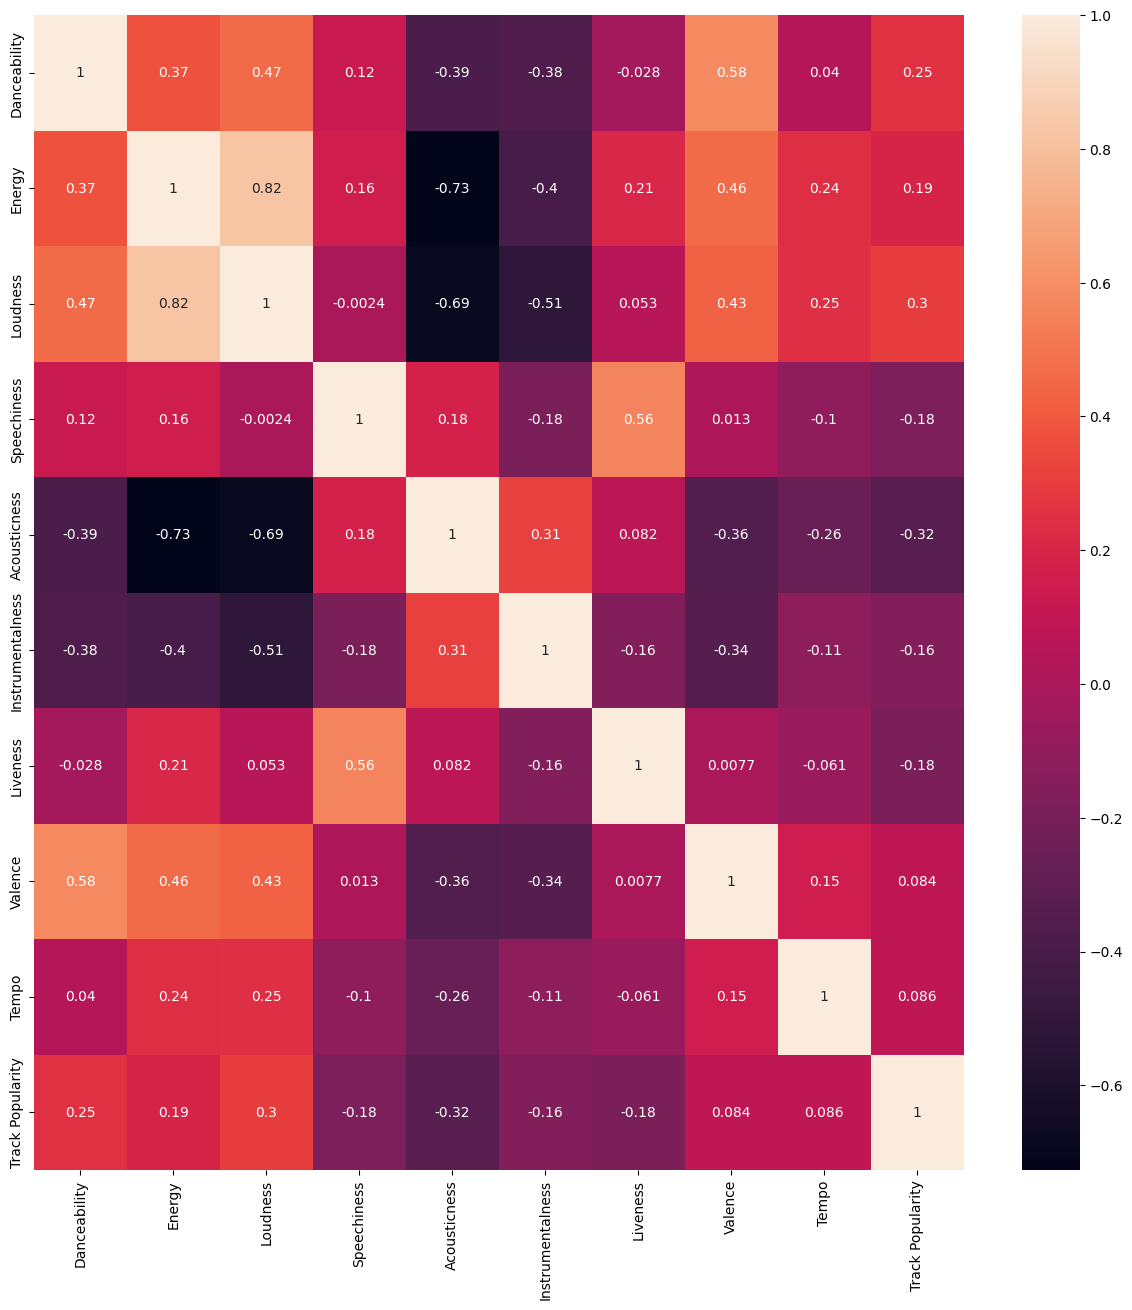

In [13]:
plt.figure(figsize=(15,15))
sb.heatmap(songdata1.corr(), annot=True)
plt.show()

From the heatmap, the correlation between track popularity and the audio features have a low correlation. The magnitudes of all of their correlation values with track popularity are below 0.4, with vote_count having the highest at 0.32.

This shows that all the audio featuress have a low linear correlation with track popularity, and thus a poor linear relationship. However, it is still possible that they may have a non-linear relationship. It is thus important to explore non-linear models as well.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


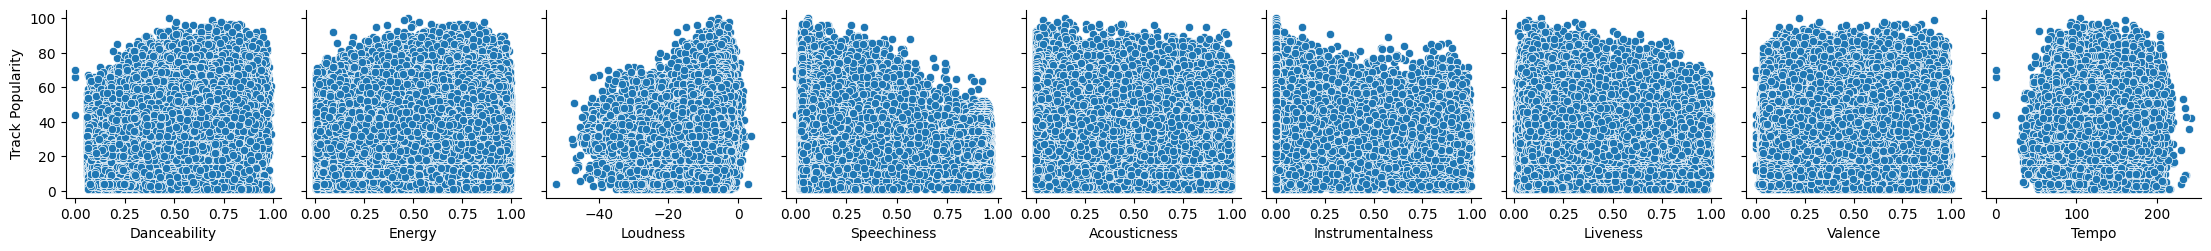

In [14]:
sb.pairplot(data=songdata1,
            y_vars=["Track Popularity"],
            x_vars=audio_features)

---

# <u>**Dataset 2: merged20k.csv**</u>
This dataset was used for the analysis of <u>artist genre</u>, <u>artist popularity</u>, <u>decade released</u> and <u>track popularity</u>. We were unable to use merged200k.csv for this analysis as merged200k.csv does not contain artist popularity and album release date.

We felt that genre would be an important factor in influencing how popular a song is. However, the Spotify API does not include a field for track genre. Since most artists tend to have their own sound, and release tracks of the same genre(s), we decided that 'artist genre' would also be a suitable variable to observe the correlation between genre and track popularity.

Artist popularity was also chosen as a predictor as we believed it would be an important variable in determining a song's popularity. For example, songs released by a popular artist like Taylor Swift always gain a lot of streams.

Decade released was also chosen in order to allow us to conduct a time comparison.

Track popularity was chosen as the response as it is a variable that reflects how much people like the song.

> **Predictors:** Artist Genre, Artist Popularity, Album Release Date\
> **Response:** Track Popularity

## **Cleaning Dataset**

In [15]:
merged20k = pd.read_csv("datasets/merged20k.csv")
merged20k

,Track Name,Album Release Date,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Artist Popularity,Track URI,Track Popularity,Release Year,Decade Released
0,act ii: date @ 8 (feat. Drake) - remix,2024-03-08,NaN,0.550,0.545,0.0,-9.304,1.0,0.1630,0.318000,0.000000,0.0608,0.412,102.469,4.0,74,spotify:track:3QS9ZCtoSCJhmaJ7QNXSAS,86,2024,2020s
1,LEAP!,2020-10-02,NaN,0.892,0.585,11.0,-7.269,1.0,0.1020,0.146000,0.000004,0.0881,0.244,104.011,4.0,50,spotify:track:3vl2uH4D2QItFFhzz5L06g,38,2020,2020s
2,Overdrive,2021-02-19,"bedroom pop, pop, pov: indie",0.568,0.788,5.0,-6.280,1.0,0.0377,0.010100,0.000000,0.1410,0.460,104.959,4.0,81,spotify:track:3QyoC6OvQUmpQwQZ18iaTs,66,2021,2020s
3,Raise y_our glass,2022-08-09,NaN,0.567,0.503,8.0,-6.119,1.0,0.1240,0.581000,0.000000,0.3690,0.184,72.798,4.0,69,spotify:track:7j1vFohEm1lbsctYY9gyGd,59,2022,2020s
4,In My Mind,2021-08-20,gen z singer-songwriter,0.668,0.392,2.0,-12.178,0.0,0.0585,0.789000,0.002750,0.3450,0.323,135.936,3.0,62,spotify:track:2W779g2UrRZtVdf3FcEOO1,72,2021,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,Get A Life,2004-03-26,"big beat,breakbeat",0.710,0.952,11.0,-6.286,0.0,0.0557,0.023200,0.000121,0.2860,0.889,137.976,4.0,43,spotify:track:4gFL3QgCRx0o1B5KjlkCR1,22,2004,2000s
18478,Kernkraft 400,2006-03-07,german techno,0.798,0.430,8.0,-7.839,0.0,0.0868,0.005500,0.901000,0.1460,0.487,140.064,4.0,48,spotify:track:6PUzxtIHkv346yP89NzP9X,57,2006,2000s
18479,Never Say Never - Radio Edit,2005-10-24,"australian dance,melbourne bounce",0.720,0.841,9.0,-6.373,1.0,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,22,spotify:track:5k9QrzJFDAp5cXVdzAi02f,17,2005,2000s
18480,Groovejet (If This Ain't Love) [feat. Sophie E...,2000-08-14,"disco house,vocal house,dance pop,europop,new ...",0.719,0.806,9.0,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,44,spotify:track:5ydeCNaWDmFbu4zl0roPAH,62,2000,2000s


As done for 'merged200k.csv', we will need to remove the rows with 'track popularity = 0' to account for the limitation where Spotify did not update the song's track popularity.

In [16]:
merged20k.drop(merged20k.loc[merged20k['Track Popularity']==0].index, inplace=True)
merged20k

,Track Name,Album Release Date,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Artist Popularity,Track URI,Track Popularity,Release Year,Decade Released
0,act ii: date @ 8 (feat. Drake) - remix,2024-03-08,NaN,0.550,0.545,0.0,-9.304,1.0,0.1630,0.318000,0.000000,0.0608,0.412,102.469,4.0,74,spotify:track:3QS9ZCtoSCJhmaJ7QNXSAS,86,2024,2020s
1,LEAP!,2020-10-02,NaN,0.892,0.585,11.0,-7.269,1.0,0.1020,0.146000,0.000004,0.0881,0.244,104.011,4.0,50,spotify:track:3vl2uH4D2QItFFhzz5L06g,38,2020,2020s
2,Overdrive,2021-02-19,"bedroom pop, pop, pov: indie",0.568,0.788,5.0,-6.280,1.0,0.0377,0.010100,0.000000,0.1410,0.460,104.959,4.0,81,spotify:track:3QyoC6OvQUmpQwQZ18iaTs,66,2021,2020s
3,Raise y_our glass,2022-08-09,NaN,0.567,0.503,8.0,-6.119,1.0,0.1240,0.581000,0.000000,0.3690,0.184,72.798,4.0,69,spotify:track:7j1vFohEm1lbsctYY9gyGd,59,2022,2020s
4,In My Mind,2021-08-20,gen z singer-songwriter,0.668,0.392,2.0,-12.178,0.0,0.0585,0.789000,0.002750,0.3450,0.323,135.936,3.0,62,spotify:track:2W779g2UrRZtVdf3FcEOO1,72,2021,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,Get A Life,2004-03-26,"big beat,breakbeat",0.710,0.952,11.0,-6.286,0.0,0.0557,0.023200,0.000121,0.2860,0.889,137.976,4.0,43,spotify:track:4gFL3QgCRx0o1B5KjlkCR1,22,2004,2000s
18478,Kernkraft 400,2006-03-07,german techno,0.798,0.430,8.0,-7.839,0.0,0.0868,0.005500,0.901000,0.1460,0.487,140.064,4.0,48,spotify:track:6PUzxtIHkv346yP89NzP9X,57,2006,2000s
18479,Never Say Never - Radio Edit,2005-10-24,"australian dance,melbourne bounce",0.720,0.841,9.0,-6.373,1.0,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,22,spotify:track:5k9QrzJFDAp5cXVdzAi02f,17,2005,2000s
18480,Groovejet (If This Ain't Love) [feat. Sophie E...,2000-08-14,"disco house,vocal house,dance pop,europop,new ...",0.719,0.806,9.0,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,44,spotify:track:5ydeCNaWDmFbu4zl0roPAH,62,2000,2000s


The drop in the number of rows indicates that successful removal of tracks with track popularity 0 has occurred. 

However, as observed, there are some rows with empty values in the column of "Artist Genres". We will need to remove these rows as they will not be useful in our analysis.

In [17]:
#Dropping all rows where "Artist Genres" is empty
merged20k = merged20k.dropna(subset=['Artist Genres']) 
merged20k

,Track Name,Album Release Date,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Artist Popularity,Track URI,Track Popularity,Release Year,Decade Released
2,Overdrive,2021-02-19,"bedroom pop, pop, pov: indie",0.568,0.788,5.0,-6.280,1.0,0.0377,0.010100,0.000000,0.1410,0.460,104.959,4.0,81,spotify:track:3QyoC6OvQUmpQwQZ18iaTs,66,2021,2020s
4,In My Mind,2021-08-20,gen z singer-songwriter,0.668,0.392,2.0,-12.178,0.0,0.0585,0.789000,0.002750,0.3450,0.323,135.936,3.0,62,spotify:track:2W779g2UrRZtVdf3FcEOO1,72,2021,2020s
6,deja vu,2021-05-21,pop,0.442,0.612,2.0,-7.222,1.0,0.1120,0.584000,0.000006,0.3700,0.178,180.917,4.0,90,spotify:track:6HU7h9RYOaPRFeh0R3UeAr,87,2021,2020s
7,poster boy,2023-04-14,gen z singer-songwriter,0.539,0.709,1.0,-6.687,1.0,0.0321,0.154000,0.066600,0.1610,0.410,163.944,4.0,62,spotify:track:2TaCG1ArsxRsUyZhqy5jei,51,2023,2020s
9,Seven (feat. Latto),2023-07-14,k-pop,0.802,0.832,11.0,-4.107,1.0,0.0434,0.311000,0.000000,0.0815,0.890,124.997,4.0,86,spotify:track:7x9aauaA9cu6tyfpHnqDLo,84,2023,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,Get A Life,2004-03-26,"big beat,breakbeat",0.710,0.952,11.0,-6.286,0.0,0.0557,0.023200,0.000121,0.2860,0.889,137.976,4.0,43,spotify:track:4gFL3QgCRx0o1B5KjlkCR1,22,2004,2000s
18478,Kernkraft 400,2006-03-07,german techno,0.798,0.430,8.0,-7.839,0.0,0.0868,0.005500,0.901000,0.1460,0.487,140.064,4.0,48,spotify:track:6PUzxtIHkv346yP89NzP9X,57,2006,2000s
18479,Never Say Never - Radio Edit,2005-10-24,"australian dance,melbourne bounce",0.720,0.841,9.0,-6.373,1.0,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,22,spotify:track:5k9QrzJFDAp5cXVdzAi02f,17,2005,2000s
18480,Groovejet (If This Ain't Love) [feat. Sophie E...,2000-08-14,"disco house,vocal house,dance pop,europop,new ...",0.719,0.806,9.0,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,44,spotify:track:5ydeCNaWDmFbu4zl0roPAH,62,2000,2000s


Now that we have our cleaned dataset, we can move on to the actual data visualisation. We can now retrieve the specific columns we need for this analysis.

In [18]:
songdata2 = pd.DataFrame(merged20k[["Artist Genres", "Artist Popularity", "Decade Released", "Track Popularity"]])
songdata2

,Artist Genres,Artist Popularity,Decade Released,Track Popularity
2,"bedroom pop, pop, pov: indie",81,2020s,66
4,gen z singer-songwriter,62,2020s,72
6,pop,90,2020s,87
7,gen z singer-songwriter,62,2020s,51
9,k-pop,86,2020s,84
...,...,...,...,...
18477,"big beat,breakbeat",43,2000s,22
18478,german techno,48,2000s,57
18479,"australian dance,melbourne bounce",22,2000s,17
18480,"disco house,vocal house,dance pop,europop,new ...",44,2000s,62


## **Visualisation of each variable**

## **Distribution of Response (Track Popularity)**

In [19]:
songdata2["Track Popularity"].describe()

count    13377.000000
mean        52.554384
std         20.228706
min          1.000000
25%         39.000000
50%         55.000000
75%         68.000000
max        100.000000
Name: Track Popularity, dtype: float64

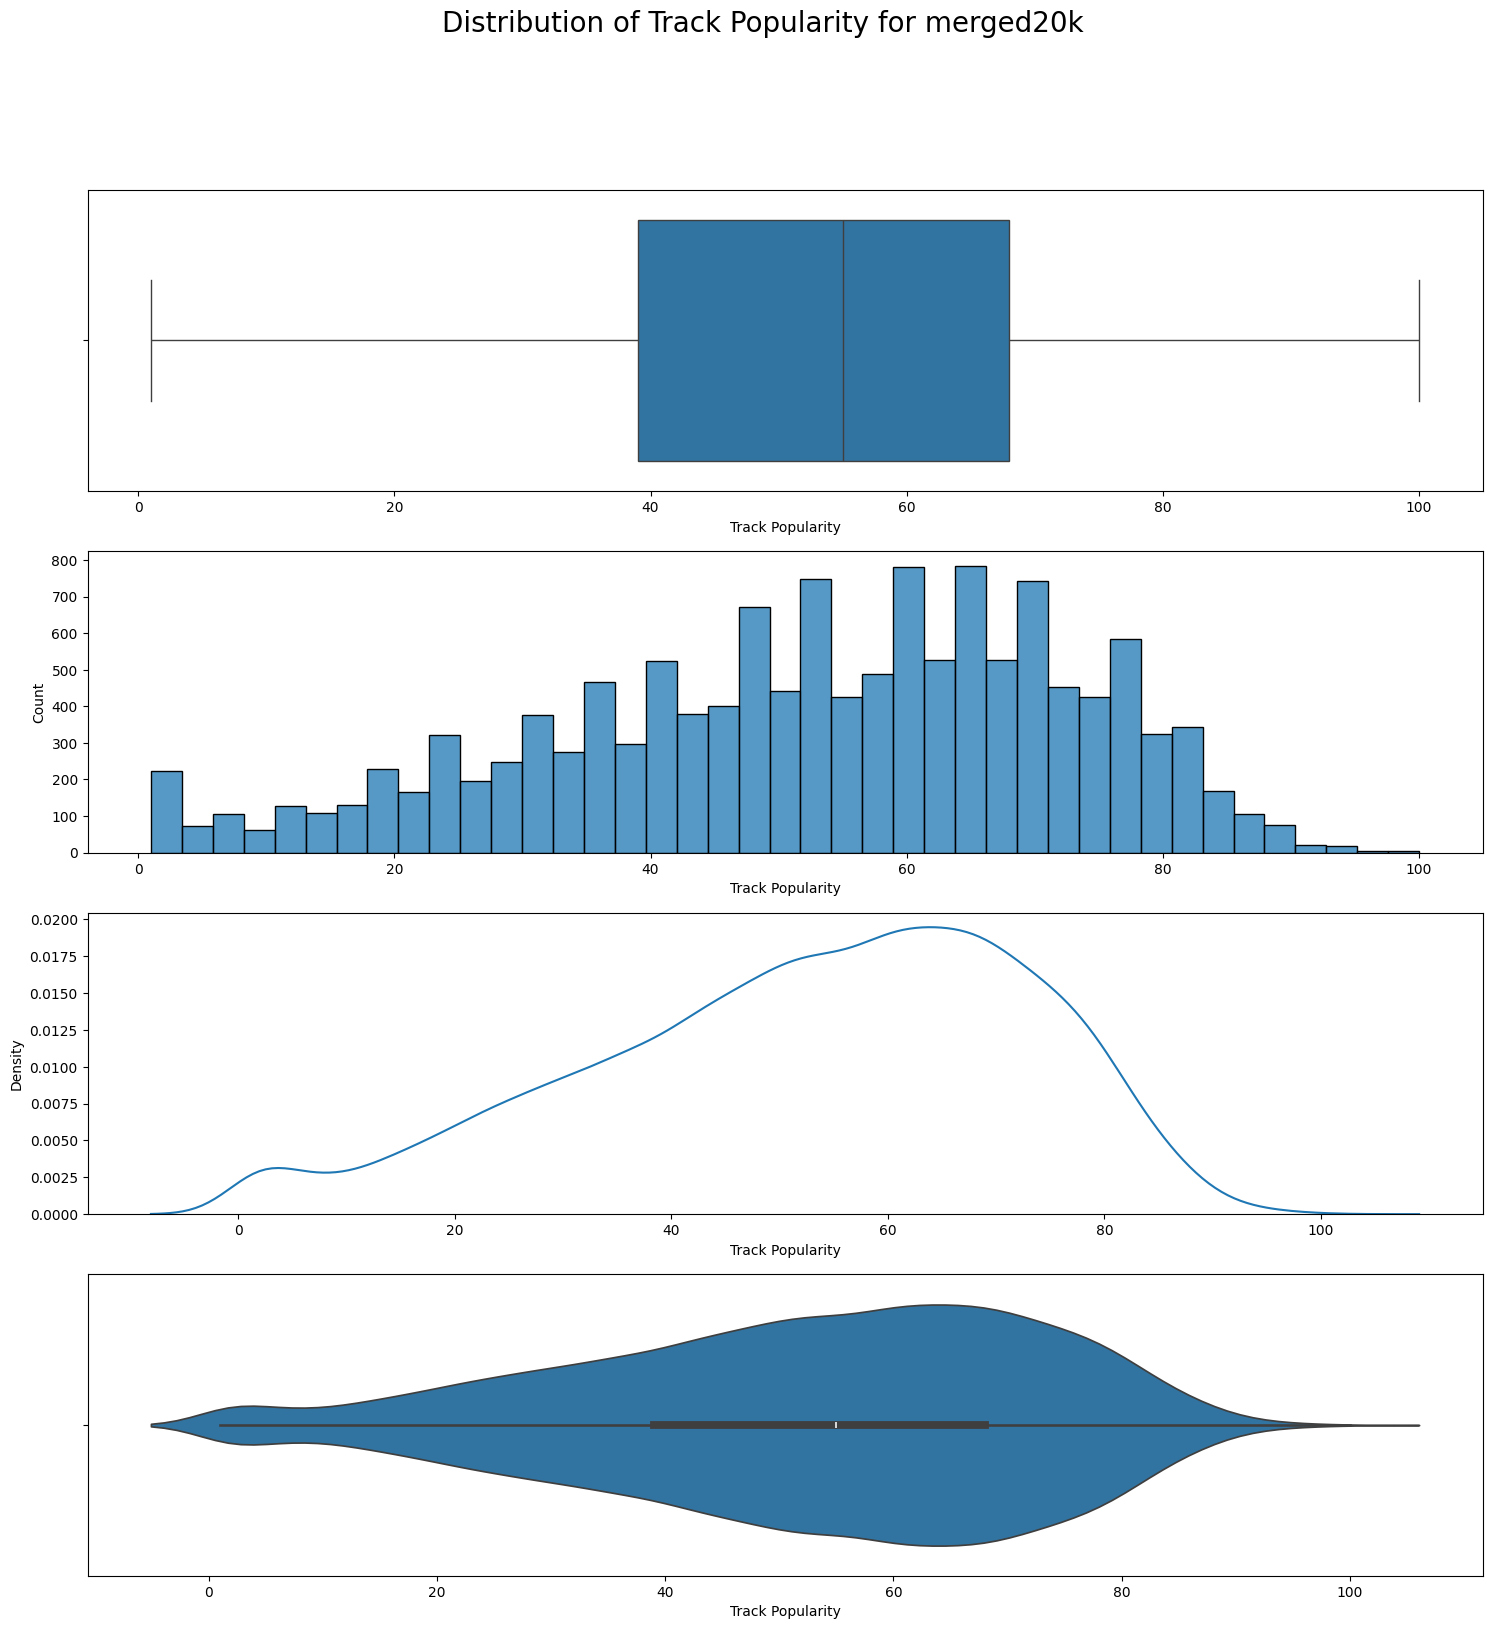

In [20]:
# Plot distribution of Track Popularity
f, axes = plt.subplots(4, figsize=(18,18))
plt.suptitle("Distribution of Track Popularity for merged20k", fontsize=20)
box_tp = sb.boxplot(data=songdata2["Track Popularity"], orient="h", ax=axes[0])
histo_tp = sb.histplot(data=songdata2["Track Popularity"], ax=axes[1])
kde_tp = sb.kdeplot(data=songdata2["Track Popularity"], ax=axes[2])
violin_tp = sb.violinplot(data=songdata2["Track Popularity"], orient="h", ax=axes[3])

<u>**Conclusions from distribution plots**</u>\
After the removal of tracks with track popularity 0, the distribution is much more balanced.

## **Visualisation of Predictors with Response (Artist Popularity, Artist Genres, Album Release Decade)**

In [21]:
genredate = songdata2[["Artist Popularity", "Artist Genres", "Decade Released", "Track Popularity"]]
genredate

,Artist Popularity,Artist Genres,Decade Released,Track Popularity
2,81,"bedroom pop, pop, pov: indie",2020s,66
4,62,gen z singer-songwriter,2020s,72
6,90,pop,2020s,87
7,62,gen z singer-songwriter,2020s,51
9,86,k-pop,2020s,84
...,...,...,...,...
18477,43,"big beat,breakbeat",2000s,22
18478,48,german techno,2000s,57
18479,22,"australian dance,melbourne bounce",2000s,17
18480,44,"disco house,vocal house,dance pop,europop,new ...",2000s,62


### **Visualisation of Artist Popularity and Track Popularity**
##### Let us first look at <u>**artist popularity**</u> by itself

In [22]:
songdata2["Artist Popularity"].describe()

count    13377.000000
mean        63.013904
std         17.357256
min          1.000000
25%         51.000000
50%         65.000000
75%         76.000000
max        100.000000
Name: Artist Popularity, dtype: float64

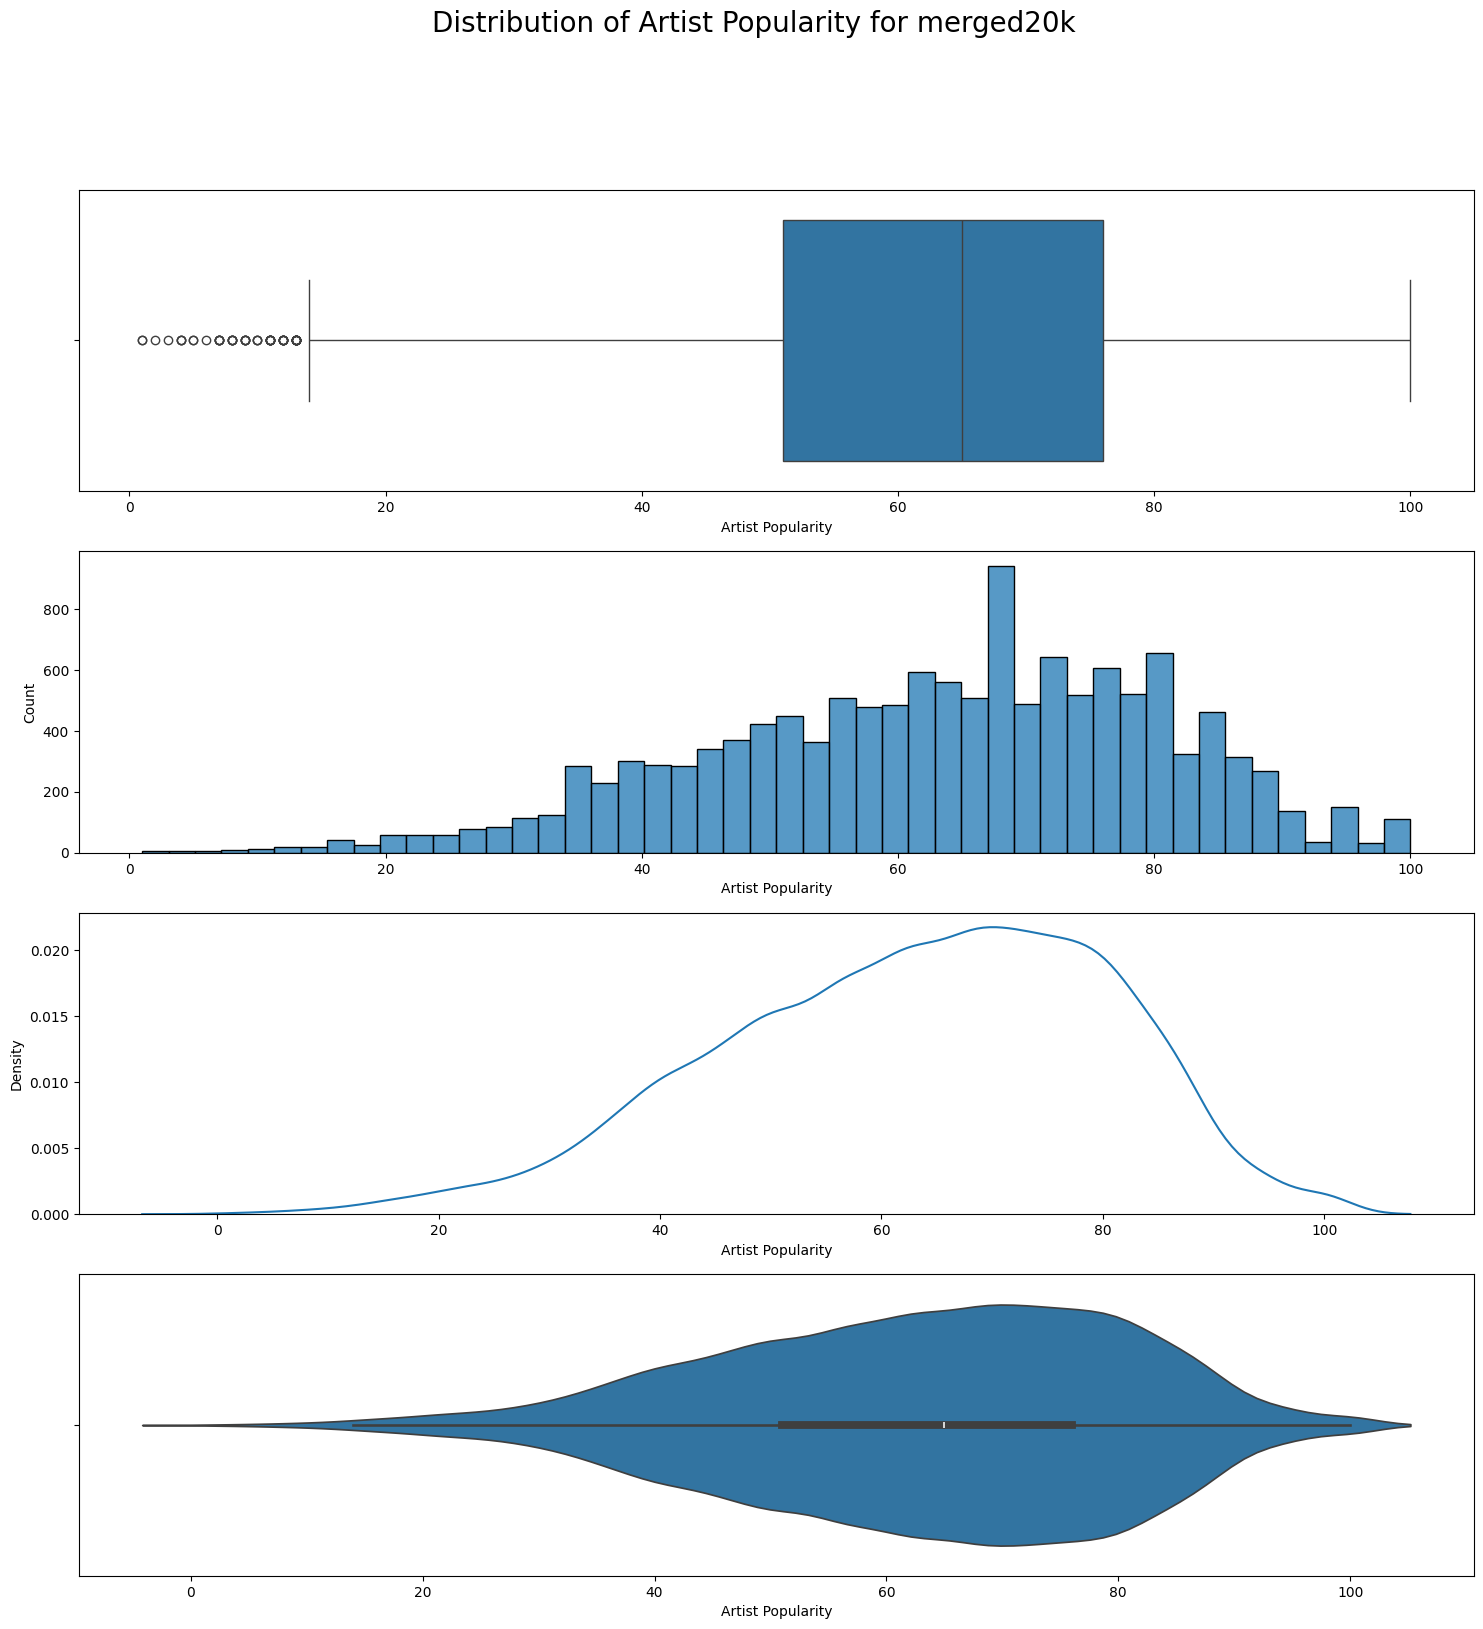

In [23]:
# Plot distribution of Artist Popularity

f, axes = plt.subplots(4, figsize=(18,18))
plt.suptitle("Distribution of Artist Popularity for merged20k", fontsize=20)
box_ap = sb.boxplot(data=songdata2["Artist Popularity"], orient="h", ax=axes[0])
histo_ap = sb.histplot(data=songdata2["Artist Popularity"], ax=axes[1])
kde_ap = sb.kdeplot(data=songdata2["Artist Popularity"], ax=axes[2])
violin_ap = sb.violinplot(data=songdata2["Artist Popularity"], orient="h", ax=axes[3])

<u>**Conclusions from distribution plots**</u>\
As seen from the distribution plots above, artist popularity's distribution is still slightly skewed. Thus, we normalised the data for the actual analyses.

This process of normalisation can be seen in our <u>***'genre-artistPopularity-releaseDate.ipynb'***</u> notebook.

---

##### Let us now look at the relation between <u>**artist popularity**</u> and <u>**track popularity**</u>

In [24]:
trackartist = pd.concat([songdata2["Track Popularity"],songdata2["Artist Popularity"]], axis=1)
trackartist

,Track Popularity,Artist Popularity
2,66,81
4,72,62
6,87,90
7,51,62
9,84,86
...,...,...
18477,22,43
18478,57,48
18479,17,22
18480,62,44


In [25]:
trackartist.corr()

,Track Popularity,Artist Popularity
Track Popularity,1.000000,0.528618
Artist Popularity,0.528618,1.000000


<Axes: >

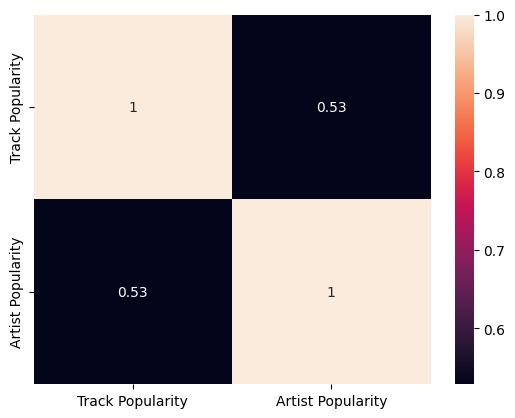

In [26]:
sb.heatmap(trackartist.corr(), annot=True)

<u>**Conclusion from Heatmap**</u>\
As seen from the above heatmap, artist popularity and track popularity has a moderate positive correlation of 0.53. However, it is still possible that they may have a non-linear relationship. It is thus important to explore non-linear models as well.

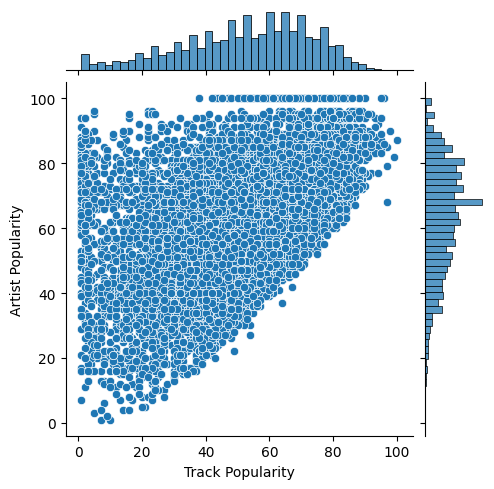

In [27]:
sb.jointplot(data=trackartist, x="Track Popularity", y="Artist Popularity", height=5)

### **Visualisation of Artist Genres and Track Popularity**
##### Let us first look at <u>**artist genres**</u> by itself

In [28]:
genredate.head()

,Artist Popularity,Artist Genres,Decade Released,Track Popularity
2,81,"bedroom pop, pop, pov: indie",2020s,66
4,62,gen z singer-songwriter,2020s,72
6,90,pop,2020s,87
7,62,gen z singer-songwriter,2020s,51
9,86,k-pop,2020s,84


In [29]:
genres = pd.DataFrame(genredate[["Artist Genres", "Track Popularity"]])
genres["Artist Genres"].value_counts()

Artist Genres
pop                                                       480
dance pop, pop                                            238
finnish dance pop, finnish hip hop, finnish pop           221
australian rock                                           156
dance pop,pop                                             125
                                                         ... 
bubblegum dance, eurodance, europop                         1
girl group, mellow gold, new wave pop, soft rock            1
melancholia, permanent wave, singer-songwriter              1
canadian pop, canadian rock, pop rock, post-grunge          1
disco house,vocal house,dance pop,europop,new wave pop      1
Name: count, Length: 4061, dtype: int64

There are multiple songs with multiple genres. We want to convert this string of multiple genres to an array of genres instead.

In [30]:
#Splitting the string by commas
genres["separated genres"] = genres["Artist Genres"].str.split(',') 

#Stripping whitespace from the splitted strings
genres["separated genres"] = genres["separated genres"].apply(lambda genres: [genre.strip() if isinstance(genre, str) else genre for genre in genres]) 

genres["separated genres"]

2                           [bedroom pop, pop, pov: indie]
4                                [gen z singer-songwriter]
6                                                    [pop]
7                                [gen z singer-songwriter]
9                                                  [k-pop]
                               ...                        
18477                                [big beat, breakbeat]
18478                                      [german techno]
18479                 [australian dance, melbourne bounce]
18480    [disco house, vocal house, dance pop, europop,...
18481    [australian dance, australian pop, dance pop, ...
Name: separated genres, Length: 13377, dtype: object

For now, we want to visualise each individual genre (and later on, its relation with Track Popularity). We can do this by <u>***exploding***</u> the cleaned_songs dataset with respect to the "separated genres" column.

In [31]:
#Exploding the dataset to make each element in the list of "separated genres" a separate row
exploded_genres = genres.explode("separated genres") 
exploded_genres

,Artist Genres,Track Popularity,separated genres
2,"bedroom pop, pop, pov: indie",66,bedroom pop
2,"bedroom pop, pop, pov: indie",66,pop
2,"bedroom pop, pop, pov: indie",66,pov: indie
4,gen z singer-songwriter,72,gen z singer-songwriter
6,pop,87,pop
...,...,...,...
18481,"australian dance,australian pop,dance pop,euro...",69,australian dance
18481,"australian dance,australian pop,dance pop,euro...",69,australian pop
18481,"australian dance,australian pop,dance pop,euro...",69,dance pop
18481,"australian dance,australian pop,dance pop,euro...",69,eurodance


In [32]:
exploded_genres["separated genres"].value_counts()

separated genres
pop                   3014
dance pop             1545
rock                  1101
rap                    862
soft rock              849
                      ... 
pop folk                 1
sacramento hip hop       1
indie r&b                1
ambient folk             1
experimental house       1
Name: count, Length: 1446, dtype: int64

There are many different artist genres found in the dataset. We will only visualise the top 10 artist genres found in all the songs as they are the most relevant.

In [33]:
# Filter to only top 10 artist genres
top10_genres = exploded_genres["separated genres"].value_counts().nlargest(10)
genretop10 = exploded_genres[exploded_genres["separated genres"].isin(top10_genres.index)]
genretop10["separated genres"].value_counts()

separated genres
pop                  3014
dance pop            1545
rock                 1101
rap                   862
soft rock             849
classic rock          758
mellow gold           674
finnish pop           657
finnish dance pop     639
pop rap               612
Name: count, dtype: int64

In [34]:
# Order dataframe by artist genres count, descending for visualisation
genretop10["Genre Count"] = genretop10["separated genres"].map(genretop10["separated genres"].value_counts())
genretop10 = genretop10.sort_values(by='Genre Count', ascending=False)
genretop10

/var/folders/fz/fh5c1mt952s8gfzlg27lyp9c0000gn/T/ipykernel_28104/115384567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genretop10["Genre Count"] = genretop10["separated genres"].map(genretop10["separated genres"].value_counts())


,Artist Genres,Track Popularity,separated genres,Genre Count
2,"bedroom pop, pop, pov: indie",66,pop,3014
3332,"dance pop, pop, uk pop",45,pop,3014
11011,"hollywood,dance pop,pop",66,pop,3014
3318,"dance pop, pop, pop rap",50,pop,3014
11008,"dance pop,girl group,pop",45,pop,3014
...,...,...,...,...
13931,"pop,r&b,east coast hip hop,gangster rap,hip ho...",69,pop rap,612
816,"hip hop, new orleans rap, pop rap, rap, trap",76,pop rap,612
4317,"dark trap, drill, hip hop, miami hip hop, pop ...",63,pop rap,612
4298,"ohio hip hop, pop rap",56,pop rap,612


We can now look at the count of the top 10 separated genres in a graph.

<Axes: xlabel='count', ylabel='separated genres'>

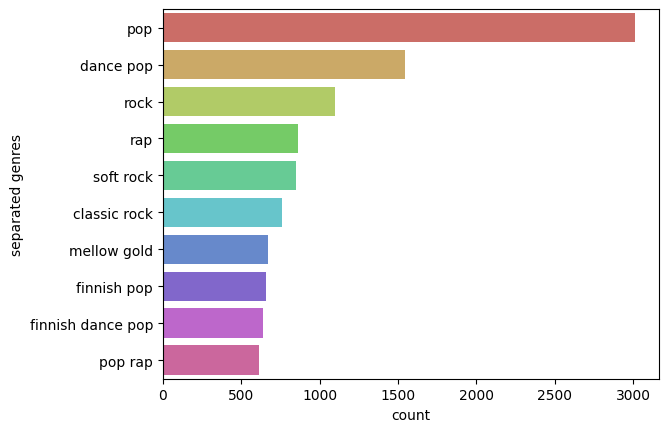

In [35]:
# Plot count plot of artist genres
sb.countplot(y=genretop10["separated genres"], hue=genretop10["separated genres"],
             palette="hls", orient='v', legend=False)

---

##### Let us now look at the relation between <u>**artist genre**</u> and <u>**track popularity**</u> by itself

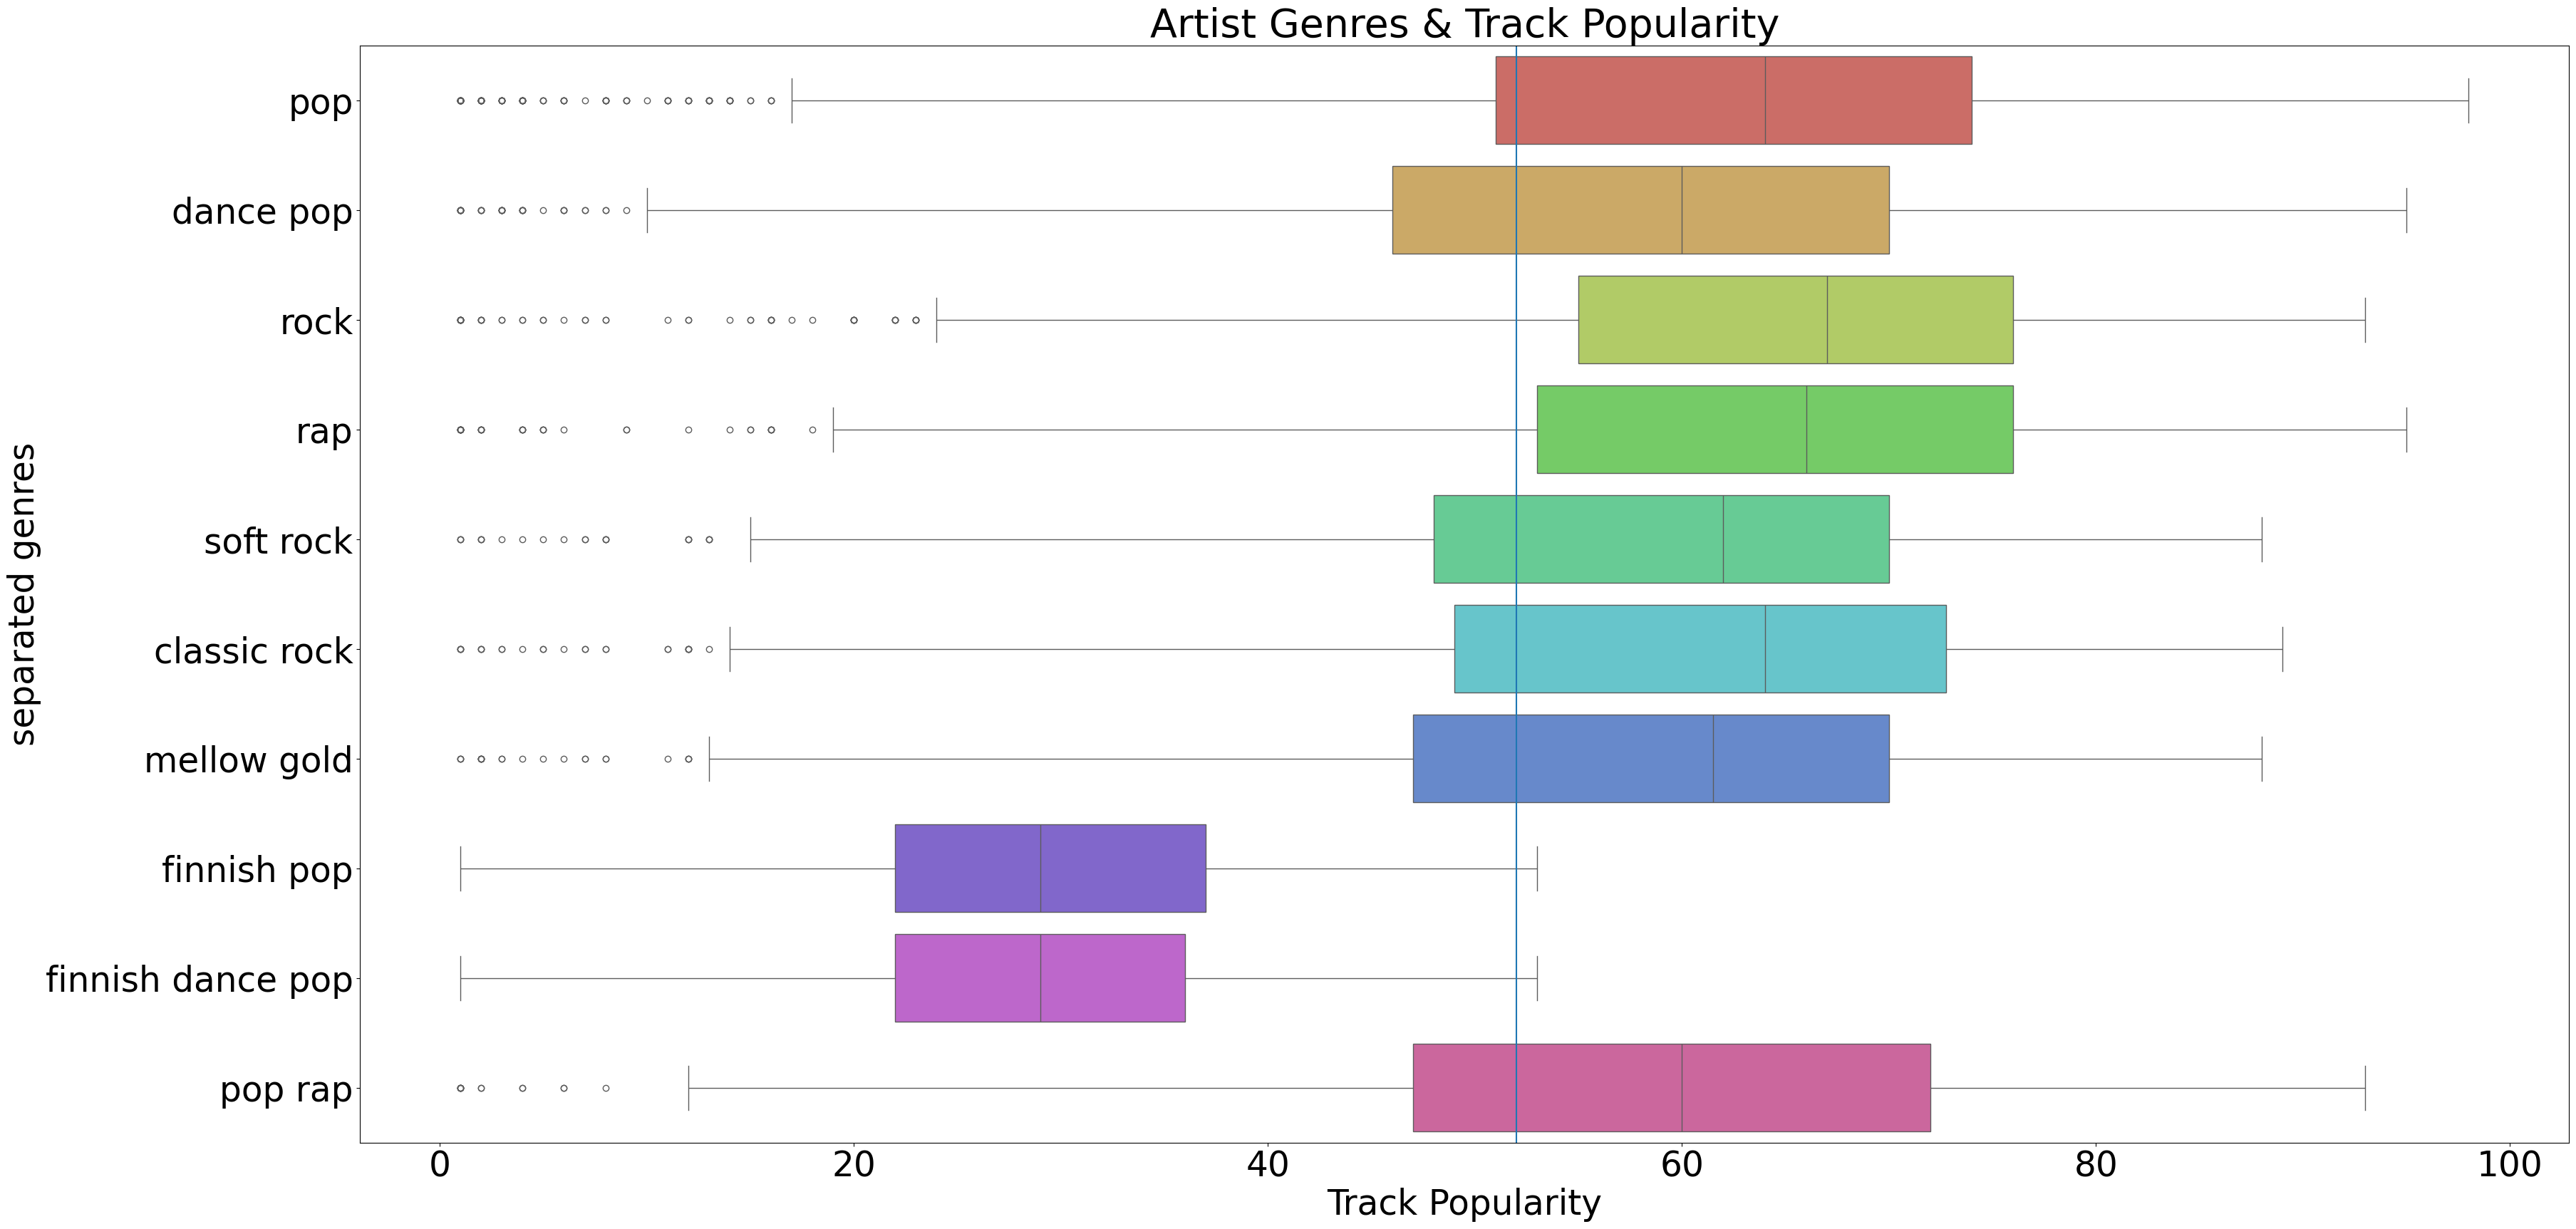

In [36]:
f, ax= plt.subplots(figsize=(40, 20))
sb.boxplot(x="Track Popularity", y="separated genres", data=genretop10,
           hue="separated genres", palette="hls",
           orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.set_xlabel("Track Popularity",fontsize=35)
ax.set_ylabel("separated genres",fontsize=35)
plt.axvline(52, label= "Track Popularity = 52")
plt.title("Artist Genres & Track Popularity", fontdict={'size':40})
plt.show()

<u>**Conclusions from box plot**</u>\
By looking at the plot above, most of the top 10 genres have track popularities that are above the median of 52 (as represented by the vertical blue line), except for finnish pop and finnish dance pop.

There are indeed some differences in the distribution of Track Popularity of each genre, but how significant is it? And can we conclude that there is a statistical relation between genres and track popularity?

We will use <u>***Analysis of Variance (ANOVA)***</u> to answer those questions and measure the correlation between genres and track popularity.

In [37]:
#Creating an array of all unique genres
genres = exploded_genres["separated genres"].unique()

#Creating a 2D array, which is an array of arrays of track popularity for each genre
popularity_lists = [exploded_genres[exploded_genres['separated genres'] == genre]['Track Popularity'].values for genre in genres]

#Perform One-way ANOVA
f_stat, p_value = f_oneway(*popularity_lists)

#Print the results of ANOVA
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 9.887964190853928, P-value: 0.0


The <u>***F-statistic***</u> is a measure of the ratio of the variance between the groups to the variance within the groups. If the null hypothesis is true (no statistical relation between artist genre and track popularity), the F-statistic is expected to be close to 1.0. Since our F-statistic is relatively greater than 1.0, it suggests that there are indeed differences in mean track popularity across different genres.

The <u>***P-value***</u> is simply the percentage of observing an F-statistic as extreme as or more extreme than the one calculated given that the null hypothesis is true. Since the P-value is 0.0, it is virtually impossible for the null hypothesis to be true, thus we can conclude that there is a statistical relation between artist genre and track popularity.

### **Visualisation of Album Release Decade and Track Popularity**
##### Let us first look at <u>**album release decade**</u> by itself

In [38]:
decades = pd.DataFrame(genredate[["Decade Released", "Track Popularity"]])
decades["Decade Released"].value_counts()

Decade Released
2010s    5577
2000s    2469
2020s    2056
1990s    1161
1980s     831
1970s     716
1960s     458
1950s     102
1940s       7
Name: count, dtype: int64

In [39]:
# Order dataframe by artist genres count, descending for visualisation
decades["Decade Count"] = decades["Decade Released"].map(decades["Decade Released"].value_counts())
decades = decades.sort_values(by='Decade Count', ascending=False)
decades

,Decade Released,Track Popularity,Decade Count
6073,2010s,13,5577
6508,2010s,75,5577
16377,2010s,27,5577
6525,2010s,81,5577
6524,2010s,79,5577
...,...,...,...
8357,1940s,42,7
7093,1940s,21,7
7009,1940s,33,7
7007,1940s,56,7


We can now look at the count of each decade in a graph.

<Axes: xlabel='count', ylabel='Decade Released'>

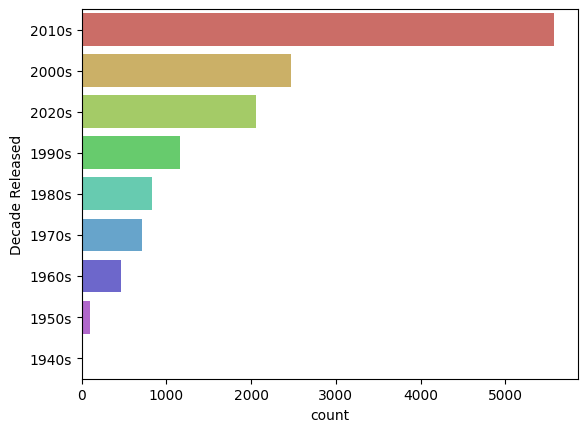

In [40]:
# Plot count plot of artist genres
sb.countplot(y=decades["Decade Released"], hue=decades["Decade Released"],
             palette="hls", orient='v', legend=False)

---

##### Let us now look at the relation between <u>**album release decade**</u> and <u>**track popularity**</u> by itself

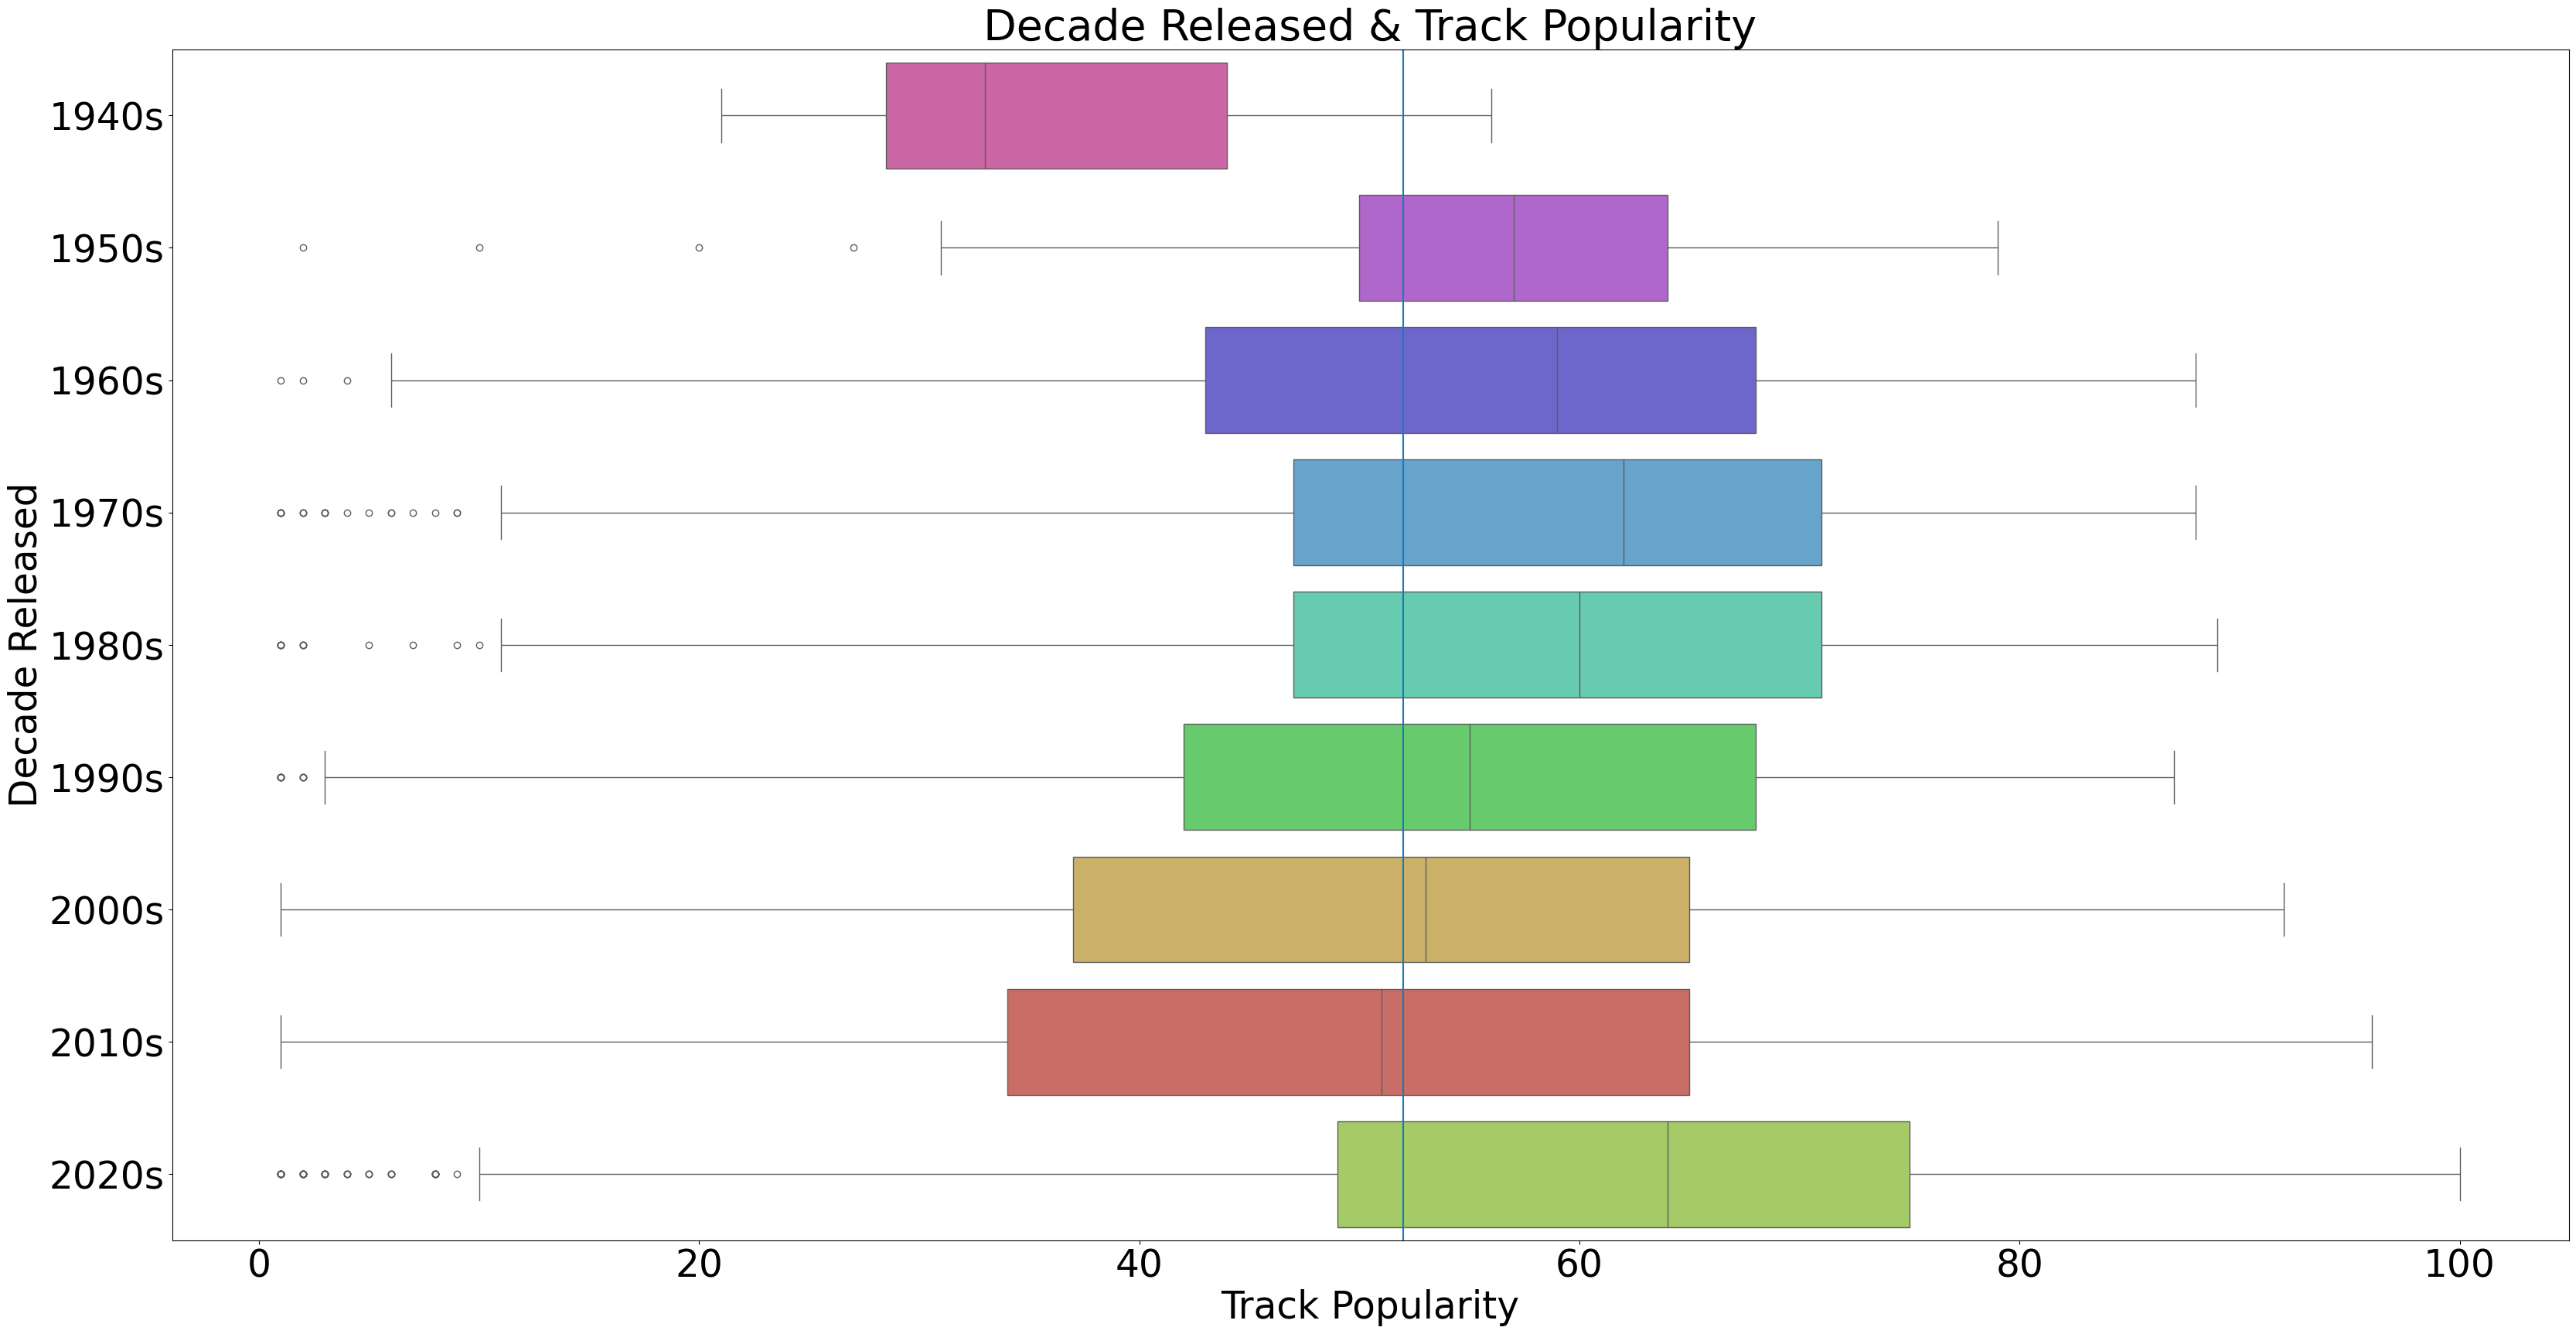

In [41]:
f, ax= plt.subplots(figsize=(40, 20))
sb.boxplot(x="Track Popularity", y="Decade Released", data=decades,
           hue="Decade Released", palette="hls",
           orient = "h", order=["1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"],
           width = 0.8)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.set_xlabel("Track Popularity",fontsize=35)
ax.set_ylabel("Decade Released",fontsize=35)
plt.axvline(52, label= "Track Popularity = 52")
plt.title("Decade Released & Track Popularity", fontdict={'size':40})
plt.show()

<u>**Conclusions from box plot**</u>\
By looking at the plot above, most decades have track popularities that are above the median of 52 (as represented by the vertical blue line), except for the 1940s.